#행정동,시간에 따른 승객수에 따른 분석
#가설 1
#귀무가설 H0:출퇴근 시간대의 승하차 인원은 다른 시간대의 승하차 인원과 통계적으로 차이가 없다.
#대립가설 H1:출퇴근 시간대의 승하차 인원은 다른 시간대의 승하차 인원과 통계적으로 차이가 있다.

In [ ]:
#향후 plt에서 쓸 한글에 글꼴 깨짐 방지를 위해 사전에 설치하였습니다
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#서울시 행정동별 총 승차 승객 정보
import xml.etree.ElementTree as ET
import pandas as pd
from io import StringIO
import requests
key="654766434f79616c31313753695a6853"
def fetch_data(start_index, end_index, key):
    url = f"http://openapi.seoul.go.kr:8088/{key}/xml/tpssSubwayPassenger/{start_index}/{end_index}/"
    response = requests.get(url)
    return response.text
#data를 가져오는 부분은 gpt의 도움을 받았습니다
# 새로운 컬럼 이름 매핑
new_column_names = {
    "CRTR_DT": "기준_날짜",
    "ADMDONG_ID":"ADMDONG_ID",
    "SBWY_PSGR_CNT": "지하철_승객_수",
    "SBWY_PSGR_CNT_00HH": "지하철_승객_수_00시",
    "SBWY_PSGR_CNT_01HH": "지하철_승객_수_01시",
    "SBWY_PSGR_CNT_02HH": "지하철_승객_수_02시",
    "SBWY_PSGR_CNT_03HH": "지하철_승객_수_03시",
    "SBWY_PSGR_CNT_04HH": "지하철_승객_수_04시",
    "SBWY_PSGR_CNT_05HH": "지하철_승객_수_05시",
    "SBWY_PSGR_CNT_06HH": "지하철_승객_수_06시",
    "SBWY_PSGR_CNT_07HH": "지하철_승객_수_07시",
    "SBWY_PSGR_CNT_08HH": "지하철_승객_수_08시",
    "SBWY_PSGR_CNT_09HH": "지하철_승객_수_09시",
    "SBWY_PSGR_CNT_10HH": "지하철_승객_수_10시",
    "SBWY_PSGR_CNT_11HH": "지하철_승객_수_11시",
    "SBWY_PSGR_CNT_12HH": "지하철_승객_수_12시",
    "SBWY_PSGR_CNT_13HH": "지하철_승객_수_13시",
    "SBWY_PSGR_CNT_14HH": "지하철_승객_수_14시",
    "SBWY_PSGR_CNT_15HH": "지하철_승객_수_15시",
    "SBWY_PSGR_CNT_16HH": "지하철_승객_수_16시",
    "SBWY_PSGR_CNT_17HH": "지하철_승객_수_17시",
    "SBWY_PSGR_CNT_18HH": "지하철_승객_수_18시",
    "SBWY_PSGR_CNT_19HH": "지하철_승객_수_19시",
    "SBWY_PSGR_CNT_20HH": "지하철_승객_수_20시",
    "SBWY_PSGR_CNT_21HH": "지하철_승객_수_21시",
    "SBWY_PSGR_CNT_22HH": "지하철_승객_수_22시",
    "SBWY_PSGR_CNT_23HH": "지하철_승객_수_23시"
}

all_data = []
for start in range(0, 150000, 1000):  # 1000개 단위로 데이터를 가져옵니다.
    end = start + 999
    xml_data = fetch_data(start, end, key)
    root = ET.parse(StringIO(xml_data)).getroot()

    for row in root.findall('.//row'):
        row_data = {elem.tag: elem.text for elem in row if elem.tag in new_column_names}
        all_data.append(row_data)



# Convert to DataFrame
df = pd.DataFrame(all_data)
# 컬럼 이름 변경
df.rename(columns=new_column_names, inplace=True)
print(df)
df.to_csv("기말과제 대체과제 첫번쨰 가설 원본1.csv", index=False, encoding="utf-8-sig")

           기준_날짜 ADMDONG_ID 지하철_승객_수 지하철_승객_수_00시 지하철_승객_수_01시 지하철_승객_수_02시  \
0       20231221    1108068     None         None         None         None   
1       20231221    1108066    22961           30            0            0   
2       20231221    1108064     None         None         None         None   
3       20231221    1108062     3508           10            0            0   
4       20231221    1108061     9509           41            0            0   
...          ...        ...      ...          ...          ...          ...   
149994  20230101    1105060     9473            0            0            0   
149995  20230101    1105061    11896            0            0            0   
149996  20230101    1105063     7084            1            0            0   
149997  20230101    1105064     None         None         None         None   
149998  20230101    1105065     None         None         None         None   

       지하철_승객_수_03시 지하철_승객_수_04시 지하철_승객_수_05시 지하철_승

In [ ]:
# API로부터 ADMDONG_ID에 맞는 행정동 데이터 가져오기(서울 데이터만 파싱)
key = "654766434f79616c31313753695a6853"
url = f"http://openapi.seoul.go.kr:8088/{key}/xml/districtEmd/0/426/"
response = requests.get(url)
xml_data = response.text

# XML 데이터 파싱
root = ET.parse(StringIO(xml_data)).getroot()
district_data = []
for row in root.findall('.//row'):
    row_data = {elem.tag: elem.text for elem in row}
    district_data.append(row_data)
# 파싱한 데이터를 DataFrame으로 변환
district_df = pd.DataFrame(district_data)
print(district_df)
district_df.to_csv("기말과제 대체과제 첫번쨰 가설 원본2.csv", index=False, encoding="utf-8-sig")

    ADMDONG_ID ADMDONG_NM ATDRC_NM SIDO_NM
0      1101053        사직동      종로구      서울
1      1101054        삼청동      종로구      서울
2      1101055        부암동      종로구      서울
3      1101056        평창동      종로구      서울
4      1101057        무악동      종로구      서울
..         ...        ...      ...     ...
421    1125072       암사1동      강동구      서울
422    1125073       천호2동      강동구      서울
423    1125074         길동      강동구      서울
424   11250760       상일1동      강동구      서울
425   11250770       상일2동      강동구      서울

[426 rows x 4 columns]


In [ ]:
#ADMDONG_ID'를 기준으로 두 data를 합침(서울 data만 사용)
merged_df = pd.merge(df, district_df, left_on='ADMDONG_ID', right_on='ADMDONG_ID', how='left')

# 결과 확인
print(merged_df.head())


      기준_날짜 ADMDONG_ID 지하철_승객_수 지하철_승객_수_00시 지하철_승객_수_01시 지하철_승객_수_02시  \
0  20231221    1108068     None         None         None         None   
1  20231221    1108066    22961           30            0            0   
2  20231221    1108064     None         None         None         None   
3  20231221    1108062     3508           10            0            0   
4  20231221    1108061     9509           41            0            0   

  지하철_승객_수_03시 지하철_승객_수_04시 지하철_승객_수_05시 지하철_승객_수_06시  ... 지하철_승객_수_17시  \
0         None         None         None         None  ...         None   
1            0            0          350         1292  ...         1324   
2         None         None         None         None  ...         None   
3            0            0           40          144  ...          248   
4            0            3          163          297  ...          680   

  지하철_승객_수_18시 지하철_승객_수_19시 지하철_승객_수_20시 지하철_승객_수_21시 지하철_승객_수_22시  \
0         None         None       

In [ ]:
# 새로운 DataFrame 생성 및 정렬
sorted_df = merged_df.sort_values(by=["기준_날짜", "ATDRC_NM"])
new_df=sorted_df.fillna(0)
# 'ADMDONG_ID'와 'SIDO_NM' 컬럼을 제거
df_removed = new_df.drop(['ADMDONG_ID','ADMDONG_NM', 'SIDO_NM'], axis=1)
# 2022로 시작하는 행 제거
df_filtered = df_removed[~new_df['기준_날짜'].str.startswith("2022")]
#열 이름 변경
df_filtered.rename(columns={'ATDRC_NM':'해당 구'}, inplace=True)
df_filtered.head()  # 결과 확인

,기준_날짜,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,지하철_승객_수_07시,...,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시,해당 구
149848,20230101,8045,0,0,0,0,1,170,294,229,...,583,681,637,614,455,432,631,400,140,강남구
149899,20230101,25080,0,0,0,0,4,174,341,262,...,1881,2513,3014,2608,1891,1617,1807,1633,192,강남구
149900,20230101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,강남구
149909,20230101,14619,2,0,0,0,17,344,359,201,...,967,1463,1283,1076,965,1066,1363,691,200,강남구
149910,20230101,13150,0,0,0,0,2,101,146,219,...,1058,1000,1264,959,653,735,550,682,357,강남구


#paired t-test용 데이터 추출+1년간 구별 승차인원 분포 그래프 만들기

In [ ]:
# 지하철 승객 수 관련 열을 숫자형으로 변환
for col in df_filtered.columns:
    if '지하철_승객_수' in col:
        df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

# '해당 구'에 따라 각 열의 합계 계산
df_sum_by_district = df_filtered.groupby('해당 구').sum()

# 결과 확인
df_sum_by_district.reset_index()


<ipython-input-6-526bf33c5b7d>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum_by_district = df_filtered.groupby('해당 구').sum()


,해당 구,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,지하철_승객_수_07시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,0,9592657,8116,39,0,0,1439,203019,558129,1443762,...,399270,437144,513376,559132,549898,280030,204918,152329,109213,43645
1,강남구,167423545,394451,360,3,1,13245,723919,1912628,4459191,...,8091861,10080318,12722401,20250923,28335149,15489262,10580919,9685244,7704133,2807536
2,강동구,46576397,71755,106,0,0,4193,911129,1923177,5044859,...,2259410,2458306,2843807,3202343,3219080,1818244,1468048,1228283,930462,383663
3,강북구,31190684,42832,101,0,0,2841,688395,1528915,3786182,...,1536884,1566856,1733874,1735753,1753097,1120513,903862,684371,541958,263538
4,강서구,73063743,95253,237,32,4,8681,1368662,2915975,7848578,...,3370581,3636778,4203305,5471828,6327447,3123831,2398312,2178657,1772466,735510
5,관악구,87795716,230749,676,8,0,64289,1693084,3137473,8822233,...,3996534,4042153,4394803,4865586,5286327,3382025,2945723,2941969,2584859,1372100
6,광진구,67225856,213357,380,2,0,6932,1026420,1978534,5051971,...,3223550,3489429,4119219,4697111,5115363,3273656,2940612,2851787,2466475,1314751
7,구로구,58089538,81707,356,1,0,127835,1590749,2394058,6205422,...,2390106,2560048,3024713,4191861,5619966,2839528,2048691,1875214,1395170,623883
8,금천구,20752799,20569,6,1,0,10856,229483,416886,1063723,...,750007,912185,1316888,3158584,4416408,1785431,1031423,805774,462696,189675
9,노원구,59270242,92748,210,4,0,30549,1322100,3041952,7456348,...,2915276,3078441,3413580,3401007,3197701,1990533,1688581,1483686,1262196,544817


In [ ]:
# 새로운 DataFrame 생성
ttest_data = df_sum_by_district.copy()

# '출퇴근 평균 승객수' 계산 및 추가
ttest_data['출퇴근 평균 승객수'] = ttest_data[['지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시',
                                     '지하철_승객_수_17시', '지하철_승객_수_18시', '지하철_승객_수_19시']].mean(axis=1)

# '그 외의 평균 승객수' 계산 및 추가
excluding_columns = ['지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시',
                     '지하철_승객_수_17시', '지하철_승객_수_18시', '지하철_승객_수_19시']
other_hours = [col for col in ttest_data.columns if col.startswith('지하철_승객_수') and col not in excluding_columns]
ttest_data['그 외의 평균 승객수'] = ttest_data[other_hours].mean(axis=1)

ttest_data.reset_index()




,해당 구,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,지하철_승객_수_07시,...,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시,출퇴근 평균 승객수,그 외의 평균 승객수
0,0,9592657,8116,39,0,0,1439,203019,558129,1443762,...,513376,559132,549898,280030,204918,152329,109213,43645,8.392032e+05,7.447418e+05
1,강남구,167423545,394451,360,3,1,13245,723919,1912628,4459191,...,12722401,20250923,28335149,15489262,10580919,9685244,7704133,2807536,1.319438e+07,1.345688e+07
2,강동구,46576397,71755,106,0,0,4193,911129,1923177,5044859,...,2843807,3202343,3219080,1818244,1468048,1228283,930462,383663,3.766302e+06,3.713420e+06
3,강북구,31190684,42832,101,0,0,2841,688395,1528915,3786182,...,1733874,1735753,1753097,1120513,903862,684371,541958,263538,2.488396e+06,2.497421e+06
4,강서구,73063743,95253,237,32,4,8681,1368662,2915975,7848578,...,4203305,5471828,6327447,3123831,2398312,2178657,1772466,735510,6.051524e+06,5.779913e+06
5,관악구,87795716,230749,676,8,0,64289,1693084,3137473,8822233,...,4394803,4865586,5286327,3382025,2945723,2941969,2584859,1372100,7.160628e+06,6.980403e+06
6,광진구,67225856,213357,380,2,0,6932,1026420,1978534,5051971,...,4119219,4697111,5115363,3273656,2940612,2851787,2466475,1314751,5.134476e+06,5.454993e+06
7,구로구,58089538,81707,356,1,0,127835,1590749,2394058,6205422,...,3024713,4191861,5619966,2839528,2048691,1875214,1395170,623883,4.958694e+06,4.548785e+06
8,금천구,20752799,20569,6,1,0,10856,229483,416886,1063723,...,1316888,3158584,4416408,1785431,1031423,805774,462696,189675,2.018928e+06,1.546949e+06
9,노원구,59270242,92748,210,4,0,30549,1322100,3041952,7456348,...,3413580,3401007,3197701,1990533,1688581,1483686,1262196,544817,4.631931e+06,4.776258e+06


In [ ]:
# '해당 구'를 인덱스에서 컬럼으로 변환
ttest_data.reset_index(inplace=True)

# final_data 생성
final_data = ttest_data[['해당 구', '지하철_승객_수', '출퇴근 평균 승객수', '그 외의 평균 승객수']]
# final_data에서 0번 행 제거
final_data = final_data.drop(index=0)
print(final_data)
final_data.to_csv("기말과제 대체과제 첫번쨰 가설 최종 수정본.csv", index=False, encoding="utf-8-sig")

    해당 구   지하철_승객_수    출퇴근 평균 승객수   그 외의 평균 승객수
1    강남구  167423545  1.319438e+07  1.345688e+07
2    강동구   46576397  3.766302e+06  3.713420e+06
3    강북구   31190684  2.488396e+06  2.497421e+06
4    강서구   73063743  6.051524e+06  5.779913e+06
5    관악구   87795716  7.160628e+06  6.980403e+06
6    광진구   67225856  5.134476e+06  5.454993e+06
7    구로구   58089538  4.958694e+06  4.548785e+06
8    금천구   20752799  2.018928e+06  1.546949e+06
9    노원구   59270242  4.631931e+06  4.776258e+06
10   도봉구   27398742  2.205780e+06  2.187516e+06
11  동대문구   36566184  2.600840e+06  3.027754e+06
12   동작구   53984217  4.210378e+06  4.352956e+06
13   마포구   99737442  7.267194e+06  8.203775e+06
14  서대문구   35411152  2.645130e+06  2.892185e+06
15   서초구  123261445  8.826611e+06  1.018754e+07
16   성동구   67876536  5.565398e+06  5.387404e+06
17   성북구   45284538  3.512696e+06  3.657521e+06
18   송파구  111313618  8.691798e+06  8.972445e+06
19   양천구   34119501  2.941904e+06  2.662504e+06
20  영등포구   97078389  8.135586e+06  7.649

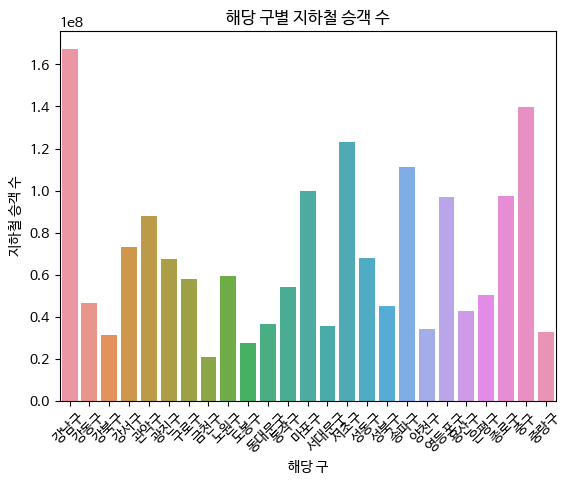

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# final_data를 사용해 그래프 그리기 (final_data는 예시 데이터프레임)
plt.rcParams['font.family'] = 'NanumBarunGothic'
sns.barplot(x='해당 구', y='지하철_승객_수', data=final_data)
plt.xticks(rotation=45)
plt.title('해당 구별 지하철 승객 수')
plt.xlabel('해당 구')
plt.ylabel('지하철 승객 수')

plt.show()


In [ ]:
import scipy.stats as stats
# 2-sample t-test 수행
t_test_result = stats.ttest_ind(final_data['출퇴근 평균 승객수'], final_data['그 외의 평균 승객수'])

# t-test 결과 출력
t_test_result


TtestResult(statistic=-0.22742640108219453, pvalue=0.8210581218938191, df=48.0)

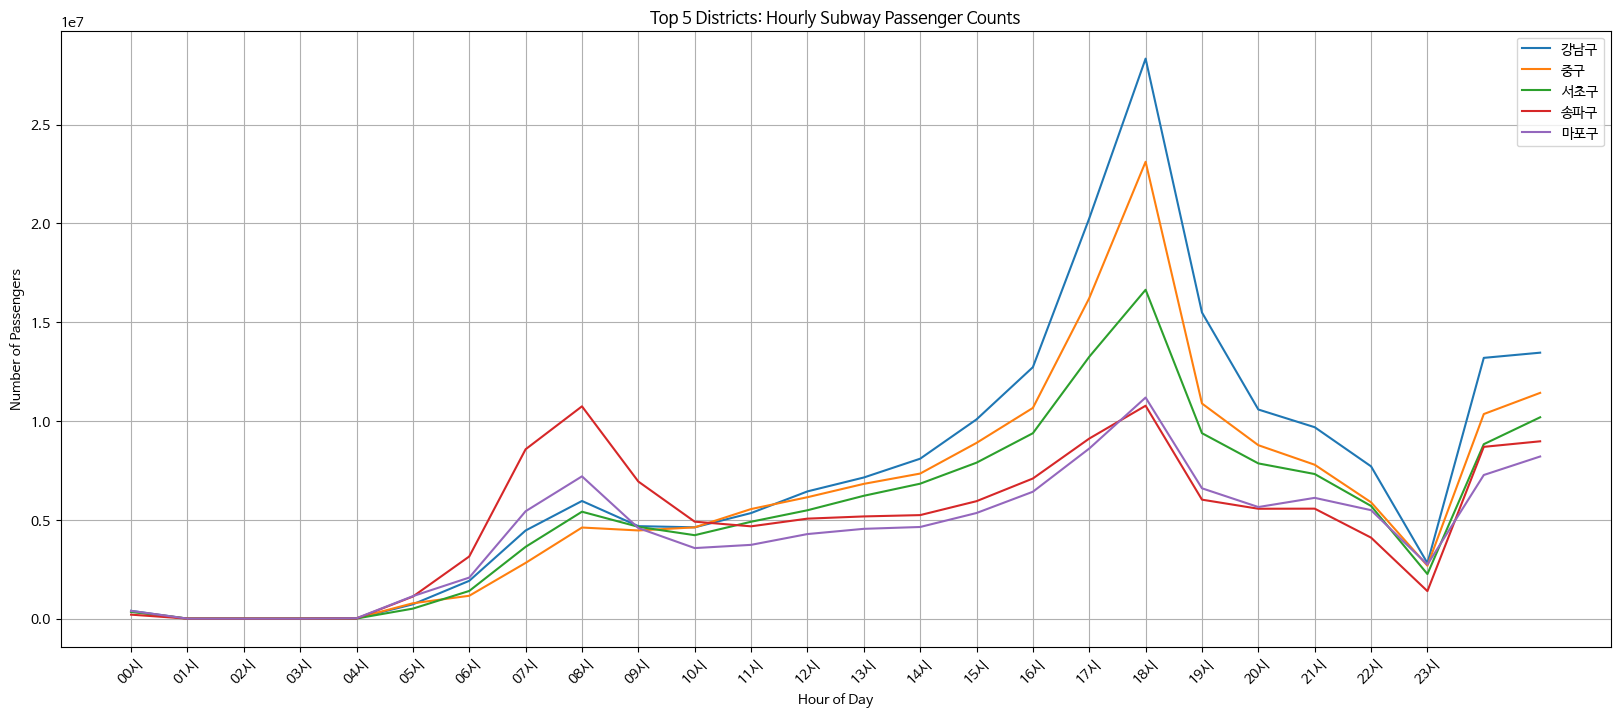

In [ ]:
# 상위 5개 구만 선택
top5_districts = final_data.nlargest(5, '지하철_승객_수')['해당 구']

# 시간대별 승객 수 그래프를 그립니다.
plt.figure(figsize=(20, 8))

# 각 구에 대한 시간대별 승객 수를 선 그래프로 그립니다.
for district in top5_districts:
    district_data = ttest_data[ttest_data['해당 구'] == district].iloc[0, 2:]
    plt.plot(district_data, label=district)

plt.title('Top 5 Districts: Hourly Subway Passenger Counts')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.xticks(range(24), [f'{hour:02d}시' for hour in range(24)], rotation=45)
plt.show()